## Estimating Current Draw Based on remaining Charge & Flight Time

We hovered the drone at a height of ~2m or so in visual mode (P-Atti but inside of a building where no GPS signal was available at any point). The drone hovered very steadily in one place. We took screenshots of the battery monitor of the DJI Go App as the drone hovered and from that recorded flight time vs. battery charge in ``mAh`` at different points in time. The charge (converted to Coulomb) and flight time (converted to seconds) is plotted below, showing a remarkably steady current draw of ~16.2A. The current (slope) is estimated using linear regression on the datapoints. 

The main problem with this measurement is the reliability of the battery charge indicator in the DJI Go App. Most likely, the charge indicator relies on measuring the voltage of the battery cells and from that indirectly estimates the remaining charge via a calibration that is probably incorrect, and we don't know how incorrect it is. It would generally have been good to perform a full charge-discharge cycle of the battery right before making the measurement, which is what the battery uses to calibrate itself. This applies especially for older batteries (ours is practically brand new, with less than 4 cycles).

A crappy estimate of the current draw can be calculated by taking the nominal capacity of the battery (4500mAh in our case) and recording the flight time. That's a terrible estimate because the battery capacity applies to a particular current strength being drawn, which is likely exceeded by the drone. More importantly the battery is not actually fully discharged, because that's bad for the battery. 20min flight time with 4500mAh suggests ``(60*60*4500/1000) C / (20*60) s = 13.5 A``, 15 min flight time suggests ``18 A``. This is an upper bound if you think the only inaccuracy is that the battery is not truly discharging 4500mAh.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
data=pd.read_csv('current_draw.csv')
data.columns=['mAh','mins','secs']
data['time [s]']=data['mins']*60+data['secs']
data['C']=60*60*data['mAh']/1000
current=data[['C','time [s]']]

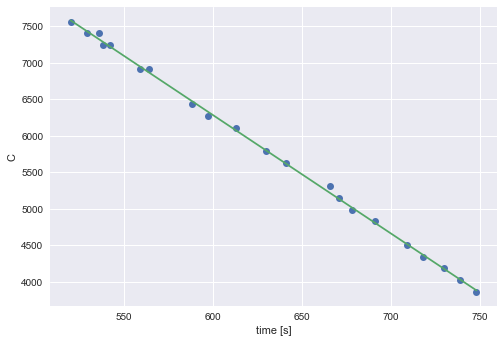

In [16]:
from scipy import stats
x=current['time [s]']
y=current['C']
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x,y)

predict_y = intercept + slope * x
pred_error = y - predict_y
degrees_of_freedom = len(x) - 2
residual_std_error = np.sqrt(np.sum(pred_error**2) / degrees_of_freedom)

plt.plot(x,y,'o')
plt.plot(x,predict_y)
plt.xlabel('time [s]')
plt.ylabel('C')

In [21]:
print('Current Draw: %1.1f A' % slope)

Current Draw: -16.2 A


In [34]:
(60*60*4000/1000) / (15*60)

16.0